In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [ ]:
from re import match, findall, sub
import re
import os
from os.path import isfile, join

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 용량이 큰 관계로 테스트 먼저

path="/content/drive/MyDrive/2021 데컬코마니 북커톤/data/수집한 데이터(다른팀)/"
file_list = os.listdir(path)
files = [file for file in file_list if file.endswith('.txt')]
print(files)
print(len(files))

['book_0.txt', 'book_1556.txt', 'book_1562.txt', 'book_1553.txt', 'book_1536.txt', 'book_1570.txt', 'book_1576.txt', 'book_1550.txt', 'book_1604.txt', 'book_1590.txt', 'book_1563.txt', 'book_1541.txt', 'book_1597.txt', 'book_1580.txt', 'book_1598.txt', 'book_1579.txt', 'book_1544.txt', 'book_1606.txt', 'book_1593.txt', 'book_1526.txt', 'book_1510.txt', 'book_1571.txt', 'book_1573.txt', 'book_1546.txt', 'book_1600.txt', 'book_1588.txt', 'book_1578.txt', 'book_1552.txt', 'book_1518.txt', 'book_1531.txt', 'book_1528.txt', 'book_1583.txt', 'book_1568.txt', 'book_1539.txt', 'book_1607.txt', 'book_1547.txt', 'book_1520.txt', 'book_1569.txt', 'book_1548.txt', 'book_1524.txt', 'book_1521.txt', 'book_1501.txt', 'book_1511.txt', 'book_1599.txt', 'book_1589.txt', 'book_1500.txt', 'book_1584.txt', 'book_1565.txt', 'book_1591.txt', 'book_1586.txt', 'book_1564.txt', 'book_1558.txt', 'book_1537.txt', 'book_1592.txt', 'book_1595.txt', 'book_1525.txt', 'book_1542.txt', 'book_1543.txt', 'book_1555.txt',

In [ ]:
all_contents=[]
for i,f in enumerate(files):
    with open (path+f) as file_path:
        contents=file_path.read()
        #print(file_path)
        all_contents.append(contents)
        #print(all_contents[i:i+1])

In [ ]:
all_contents

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# puctuation 제거
from string import punctuation
def strip_punctuation(s):
    return ''.join(c for c in s if c not in punctuation)

clean =[]
for sent in all_contents:
    clean_text = strip_punctuation(sent)
    clean.append(clean_text)
    
clean

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from konlpy.tag import Okt
okt = Okt()

In [ ]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

In [ ]:
# 불용어 처리
stop_words="아 준 겐 음 이제 층 이따 꼭 접 막 난 다가 이일 걸 자주 고 여간 대 도 채 뭐 테 쪽 간 바 터 리 거기 듯 위 다 는걸 아주 휴 아이구 아이쿠 아이고 니 건 곳 어 나 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐 거 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 로서 때 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 여 얼마간 약간 다소 좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면 뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오 왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍 뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 하더라도 할지라도 일지라도 지든지 몇 거의 하마터면 인젠 이젠 된바에야 된이상 만큼 어찌됏든 그위에 게다가 점에서 보아 비추어 보아 고려하면 하게될것이다 일것이다 비교적 좀 보다더 비하면 시키다 하게하다 할만하다 의해서 연이서 이어서 잇따라 뒤따라 뒤이어 결국 의지하여 기대여 통하여 자마자 더욱더 불구하고 얼마든지 마음대로 주저하지 않고 곧 즉시 바로 당장 하자마자 밖에 안된다 하면된다 그래 그렇지 요컨대 다시 말하자면 바꿔 말하면 즉 구체적으로 말하자면 시작하여 시초에 이상 허 헉 허걱 바와같이 해도좋다 해도된다 게다가 더구나 하물며 와르르 팍 퍽 푹 픽 폭 펄렁 동안 이래 하고있었다 이었다 에서 로부터 까지 예하면 했어요 해요 더불어 마저 마저도 양자 모두 습니다 가까스로 하려고하다 즈음하여 다른 다른 방면으로 해봐요 습니까 했어요 말할것도 없고 무릎쓰고 개의치않고 하는것만 못하다 하는것이 낫다 매 매번 들 모 어느것 어느 로써 갖고말하자면 어디 어느쪽 어느것 어느해 어느 년도 라 해도 언젠가 어떤것 어느것 저기 저쪽 저것 그때 그럼 그러면 요만한걸 그래 그때 저것만큼 그저 이르기까지 할 줄 안다 할 힘이 있다 너 너희 당신 어찌 설마 차라리 할지언정 할지라도 할망정 할지언정 구토하다 게우다 토하다 메쓰겁다 옆사람 퉤 쳇 의거하여 근거하여 의해 따라 힘입어 그 다음 버금 두번째로 기타 첫번째로 나머지는 그중에서 견지에서 형식으로 쓰여 입장에서 위해서 단지 의해되다 하도록시키다 뿐만아니라 반대로 전후 전자 앞의것 잠시 잠깐 하면서 그렇지만 다음에 그러한즉 그런즉 남들 아무거나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 어떻게 만약 만일 위에서 서술한바와같이 인 듯하다 하지 않는다면 만약에 무엇 무슨 어느 어떤 아래윗 조차 한데 그럼에도 불구하고 여전히 심지어 까지도 조차도 하지 않도록 않기 위하여 때 시각 무렵 시간 동안 어때 어떠한 하여금 네 예 우선 누구 누가 알겠는가 아무도 줄은모른다 줄은 몰랏다 하는 김에 겸사겸사 하는바 그런 까닭에 한 이유는 그러니 그러니까 때문에 그 너희 그들 너희들 타인 것 것들 너 위하여 공동으로 동시에 하기 위하여 어찌하여 무엇때문에 붕붕 윙윙 나 우리 엉엉 휘익 윙윙 오호 아하 어쨋든 만 못하다 하기보다는 차라리 하는 편이 낫다 흐흐 놀라다 상대적으로 말하자면 마치 아니라면 쉿 그렇지 않으면 그렇지 않다면 안 그러면 아니었다면 하든지 아니면 이라면 좋아 알았어 하는것도 그만이다 어쩔수 없다 하나 일 일반적으로 일단 한켠으로는 오자마자 이렇게되면 이와같다면 전부 한마디 한항목 근거로 하기에 아울러 하지 않도록 않기 위해서 이르기까지 이 되다 로 인하여 까닭으로 이유만으로 이로 인하여 그래서 이 때문에 그러므로 그런 까닭에 알 수 있다 결론을 낼 수 있다 으로 인하여 있다 어떤것 관계가 있다 관련이 있다 연관되다 어떤것들 에 대해 이리하여 그리하여 여부 하기보다는 하느니 하면 할수록 운운 이러이러하다 하구나 하도다 다시말하면 다음으로 에 있다 에 달려 있다 우리 우리들 오히려 하기는한데 어떻게 어떻해 어찌됏어 어때 어째서 본대로 자 이 이쪽 여기 이것 이번 이렇게말하자면 이런 이러한 이와 같은 요만큼 요만한 것 얼마 안 되는 것 이만큼 이 정도의 이렇게 많은 것 이와 같다 이때 이렇구나 것과 같이 끼익 삐걱 따위 와 같은 사람들 부류의 사람들 왜냐하면 중의하나 오직 오로지 에 한하다 하기만 하면 도착하다 까지 미치다 도달하다 정도에 이르다 할 지경이다 결과에 이르다 관해서는 여러분 하고 있다 한 후 혼자 자기 자기집 자신 우에 종합한것과같이 총적으로 보면 총적으로 말하면 총적으로 대로 하다 으로서 참 그만이다 할 따름이다 쿵 탕탕 쾅쾅 둥둥 봐 봐라 아이야 아니 와아 응 아이 참나 년 월 일 령 영 일 이 삼 사 오 육 륙 칠 팔 구 이천육 이천칠 이천팔 이천구 하나 둘 셋 넷 다섯 여섯 일곱 여덟 아홉 령 영 이 있 하 것 들 그 되 수 이 보 않 없 나 사람 주 아니 등 같 우리 때 년 가 한 지 대하 오 말 일 그렇 위하 때문 그것 두 말하 알 그러나 받 못하 일 그런 또 문제 더 사회 많 그리고 좋 크 따르 중 나오 가지 씨 시키 만들 지금 생각하 그러 속 하나 집 살 모르 적 월 데 자신 안 어떤 내 내 경우 명 생각 시간 그녀 다시 이런 앞 보이 번 나 다른 어떻 여자 개 전 들 사실 이렇 점 싶 말 정도 좀 원 잘 통하 놓"
stop_words=stop_words.split(' ')

In [ ]:
stop_words

['아',
 '준',
 '겐',
 '음',
 '이제',
 '층',
 '이따',
 '꼭',
 '접',
 '막',
 '난',
 '다가',
 '이일',
 '걸',
 '자주',
 '고',
 '여간',
 '대',
 '도',
 '채',
 '뭐',
 '테',
 '쪽',
 '간',
 '바',
 '터',
 '리',
 '거기',
 '듯',
 '위',
 '다',
 '는걸',
 '아주',
 '휴',
 '아이구',
 '아이쿠',
 '아이고',
 '니',
 '건',
 '곳',
 '어',
 '나',
 '저희',
 '따라',
 '의해',
 '을',
 '를',
 '에',
 '의',
 '가',
 '으로',
 '로',
 '에게',
 '뿐이다',
 '의거하여',
 '근거하여',
 '입각하여',
 '기준으로',
 '예하면',
 '예를',
 '들면',
 '예를',
 '들자면',
 '저',
 '소인',
 '소생',
 '저희',
 '지말고',
 '하지마',
 '하지마라',
 '다른',
 '물론',
 '또한',
 '그리고',
 '비길수',
 '없다',
 '해서는',
 '안된다',
 '뿐',
 '거',
 '뿐만',
 '아니라',
 '만이',
 '아니다',
 '만은',
 '아니다',
 '막론하고',
 '관계없이',
 '그치지',
 '않다',
 '그러나',
 '그런데',
 '하지만',
 '든간에',
 '논하지',
 '않다',
 '따지지',
 '않다',
 '설사',
 '비록',
 '더라도',
 '아니면',
 '만',
 '못하다',
 '하는',
 '편이',
 '낫다',
 '불문하고',
 '향하여',
 '향해서',
 '향하다',
 '쪽으로',
 '틈타',
 '이용하여',
 '타다',
 '오르다',
 '제외하고',
 '이',
 '외에',
 '이',
 '밖에',
 '하여야',
 '비로소',
 '한다면',
 '몰라도',
 '외에도',
 '이곳',
 '여기',
 '부터',
 '기점으로',
 '따라서',
 '할',
 '생각이다',
 '하려고하다',
 '이리하여',
 '그리하여',
 '그렇게',
 '함으로써',
 '하지만',

In [ ]:
# test
text=clean[10]
text

'처음 베트남 하노이를 방문하고 나서 그 매력에 빠져 최근 가장 자주 방문한 나라가 베트남일 정도로 난 베트남에 푹 빠져있었다가다듬어지지 않은 올드스쿨을 좋아하는 내 취향인 탓도 있지만 물가도 싸고 음식도 맛있고 볼 것도 많은 나라 수많은 침략을 단 한 번의 패배 없이 이겨낸 기적의 나라 몽골제국도 미국도 프랑스도\xa0이기지 못한 작지만 강한 나라 베트남을 영화 굿모닝 베트남과 함께 추억해본다굿모닝 베트남은 미군 방송국의\xa0글리스 지부에서 활동하다가\xa0베트남 사이공호찌민에 위치한 \xa0주월 미군 방송국에 새로 부임해 온 인기 라디오 DJ\xa0애드리언 크로나워 공군 일병이 사이공에서 방송을 하면서 겪는 일상을 코믹하면서도 담담하게 그린 반전 영화이다베트남전에 대한 배경 지식이 있어야 재미있겠지만 전쟁의 참혹성을 보이는 그대로 보여주기보다는 뒤로 돌려 보여주는 영화의 특성상 미국과 베트남의 전쟁에 대해서는 플레툰이나 풀 메탈 재킷 같은 영화에서 조금 더 자세하게 다루도록 하고 굿모닝 베트남에서는 가볍게 짚어나가 보겠다영화에서 미국 장병들에게 웃음을 준 크로나워그리고 제2의 찰리 채플린이라는 찬사를 받으며 수많은 영화에서 우리에게 웃음과 감동을 준 로빈 윌리엄스우리에게 잔잔한 웃음을\xa0주던 로빈 윌리엄스 본인은 정작 우울증에 의한 자살을 했다\xa0남을 웃기고 자신은 웃지 못했던 아이러니한 삶이었다\xa0\xa0살아생전 코카인 중독 심장병 알코올 중독에 우울증까지 앓았다 향년 63세 관객을 웃기는 세계적인 코미디 배우의 삶은 그리 행복하진 못했다 로빈 윌리엄스는 한 때 코카인과 알코올 중독을 이겨내기 위해 홀로 고독한 싸움을 했다\xa0로빈 윌리엄스 아내인 수전 슈나이더는 뉴욕타임스와 인터뷰에서 오늘 오전 난 내 남편이자 가장 좋은 친구를 잃었다 그는 사랑받는 아티스트이자 아름다운 사람이었다며 로빈 윌리엄스의 죽음보다 생전 그가 보여줬던 기쁨과 웃음에 초점을 맞춰달라라고 부탁했다 이어 로빈 윌리엄스 사생활도 지켜주길 바란다며 로빈 윌리엄스를 힘들게 

In [ ]:
# test
clean_text=re.sub('[^가-힣a-zA-Z]', '', text)
result=[]
nouns=okt.nouns(clean_text)
for w in nouns:
    if w not in stop_words:
        result.append(w)
print(result)

['날나', '그날', '옷', '글감', '칠판', '가혹', '누군가', '날', '옷', '기억', '글', '제안', '결코', '날', '다그', '하루', '경험', '그날', '옷차림', '주제', '모은수', '편의', '글', '옷차림', '유독', '기억', '이야기', '스물', '살의', '혜', '이야기', '한번', '알바', '해', '본적', '열', '살의', '혜였다도혜', '대부분', '고등학생', '부모님', '용돈', '학교', '학원', '친구', '윤', '고등학생', '신분', '알바', '다그', '동네', '관광지', '시작', '곳곳', '알바', '방과후', '윤', '식당', '서빙', '신의', '용돈', '직접', '료', '난방', '비도', '직접', '내야', '사정', '이윤', '혜', '반', '친구', '윤', '윤', '친구', '초대', '파티', '곤', '혜', '슬픔', '낭만', '한윤', '이의', '모습', '동경', '당시', '윤', '빗집', '알바', '중국집', '알바', '병행', '하루', '빗집', '알바', '바람', '중국집', '알바', '타가', '대타', '윤', '혜', '용기', '대신', '출근', '자처', '정말', '윤', '이보', '모습', '이내', '혜', '부모', '어려움', '용돈', '난생처음', '경험', '염치', '차마', '입', '부끄러움', '혜', '는가', '보라색', '맨투맨티', '입', '고윤', '가일', '중국집', '문', '호감', '일꾼', '이기', '위해', '신경', '옷', '퇴근', '옷소매', '짜장면', '소스', '짬뽕', '국물', '잔뜩', '튀어', '사랑', '친구', '대타', '첫', '알바', '날', '장', '티셔츠', '혜', '마음', '윤', '덕분', '혜', '처음', '이부', '워', '결여', '통해', '윤', '일찌', '감치', '신형철', '평론가', 

In [ ]:
# 빈도 확인
word_count={}
for n in nouns:
    word_count[n]=word_count.get(n, 0)+1
word_count

{'과거': 1,
 '그대': 1,
 '다시': 1,
 '다인': 1,
 '당최': 1,
 '도의': 1,
 '때문': 1,
 '본적': 1,
 '어디': 1,
 '얼굴': 2,
 '여행': 2,
 '영상': 2,
 '요즘': 1,
 '윽': 1,
 '인도': 3,
 '인도사람': 1,
 '인도인': 1,
 '진짜': 1,
 '초이': 1,
 '코로나': 1,
 '한눈': 1,
 '후': 1}

In [ ]:
# 전체 데이터에서 noun 추출
result=[]
for i in clean:
    clean_text=re.sub('[^가-힣a-zA-Z]', '', i)
    nouns=okt.nouns(clean_text)
    for w in nouns:
        if w not in stop_words:
            result.append(w)

print(result)

In [ ]:
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models.wrappers import LdaMallet
from gensim.models.coherencemodel import CoherenceModel
from gensim import similarities

import os.path
import re
import glob

import nltk
nltk.download('stopwords')

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [ ]:
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet' # you should NOT need to change this 
corpus_path = 'transcripts' # you need to change this path to the directory containing your corpus of .txt files

In [ ]:
from collections import Counter
count=Counter(result)
common_list=count.most_common(100)
print(common_list)

[('곳', 765), ('여행', 731), ('마음', 571), ('시작', 551), ('날', 551), ('눈', 519), ('길', 510), ('내가', 502), ('처음', 495), ('도착', 486), ('분', 462), ('모습', 461), ('위', 426), ('한국', 412), ('거리', 408), ('이야기', 405), ('도시', 404), ('거', 396), ('시', 385), ('나라', 379), ('차', 378), ('순간', 375), ('뒤', 375), ('사진', 372), ('터', 369), ('자리', 365), ('하루', 360), ('아침', 358), ('리', 349), ('친구', 349), ('느낌', 344), ('숙소', 333), ('이유', 331), ('끝', 327), ('저녁', 326), ('대', 325), ('기분', 324), ('기억', 319), ('마지막', 319), ('바', 317), ('나의', 315), ('풍경', 312), ('사이', 308), ('밤', 308), ('세계', 308), ('옆', 307), ('건', 306), ('유명', 306), ('몸', 306), ('유럽', 306), ('오늘', 299), ('비', 286), ('밖', 285), ('소리', 283), ('필요', 282), ('버스', 278), ('세상', 274), ('해', 273), ('간', 272), ('뿐', 271), ('주변', 269), ('경험', 269), ('이름', 268), ('르', 263), ('배', 263), ('준비', 263), ('손', 262), ('바람', 261), ('돈', 260), ('하늘', 258), ('음식', 256), ('상황', 254), ('방', 252), ('듯', 252), ('물', 249), ('일정', 249), ('문', 246), ('이동', 246), ('건물', 244), ('

In [ ]:
import gensim
from gensim import corpora, models

In [ ]:
high_score_reviews=result

In [ ]:
#high_score_reviews=[[y for y in x if not len(y)==1] 
#                    for x in high_score_reviews]
dataset = [h.split() for h in high_score_reviews]
dictionary = corpora.Dictionary(dataset)
corpus=[dictionary.doc2bow(Content) for Content in dataset]

In [ ]:
corpus

[[(0, 1)],
 [(1, 1)],
 [(2, 1)],
 [(3, 1)],
 [(4, 1)],
 [(5, 1)],
 [(6, 1)],
 [(7, 1)],
 [(8, 1)],
 [(9, 1)],
 [(10, 1)],
 [(11, 1)],
 [(12, 1)],
 [(13, 1)],
 [(14, 1)],
 [(15, 1)],
 [(16, 1)],
 [(17, 1)],
 [(18, 1)],
 [(19, 1)],
 [(20, 1)],
 [(21, 1)],
 [(22, 1)],
 [(23, 1)],
 [(24, 1)],
 [(25, 1)],
 [(26, 1)],
 [(27, 1)],
 [(28, 1)],
 [(29, 1)],
 [(30, 1)],
 [(31, 1)],
 [(32, 1)],
 [(33, 1)],
 [(34, 1)],
 [(35, 1)],
 [(36, 1)],
 [(37, 1)],
 [(38, 1)],
 [(39, 1)],
 [(40, 1)],
 [(41, 1)],
 [(42, 1)],
 [(43, 1)],
 [(44, 1)],
 [(45, 1)],
 [(46, 1)],
 [(47, 1)],
 [(48, 1)],
 [(49, 1)],
 [(50, 1)],
 [(51, 1)],
 [(52, 1)],
 [(53, 1)],
 [(54, 1)],
 [(55, 1)],
 [(56, 1)],
 [(57, 1)],
 [(58, 1)],
 [(59, 1)],
 [(60, 1)],
 [(61, 1)],
 [(62, 1)],
 [(63, 1)],
 [(64, 1)],
 [(65, 1)],
 [(66, 1)],
 [(67, 1)],
 [(68, 1)],
 [(69, 1)],
 [(70, 1)],
 [(71, 1)],
 [(72, 1)],
 [(73, 1)],
 [(74, 1)],
 [(75, 1)],
 [(76, 1)],
 [(77, 1)],
 [(78, 1)],
 [(79, 1)],
 [(80, 1)],
 [(81, 1)],
 [(82, 1)],
 [(83, 1)],
 [

In [ ]:
## Coherence Model을 통한 토픽 최적화
### 토픽이 얼마나 의미론적으로 일관성 있는지 판단. 높을수록 의미론적 일관성 높음
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

coherence_values = []
for i in range(2,10):
    ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model_lda=CoherenceModel(model=ldamodel, texts=high_score_reviews, dictionary=dictionary, topn=10)
    coherence_lda=coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

/usr/local/lib/python3.7/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
/usr/local/lib/python3.7/dist-packages/gensim/topic_coherence/indirect_confirmation_measure.py:317: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


ValueError: ignored

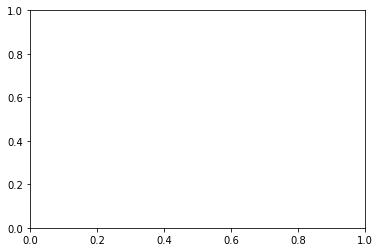

In [ ]:
x=range(8,13)
plt.plot(x, coherence_values)
plt.xlabel('Number of topics')
plt.ylabel('Coherence Score')
plt.show()

In [ ]:
## 언어 모델 평가 방법
### 확률 모델이 결과를 얼마나 정확하게 예측하는지 판단. 낮을수록 정확하게 예측
import matplotlib.pyplot as plt
perplexity_values = []
for i in range(2,20):
    ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

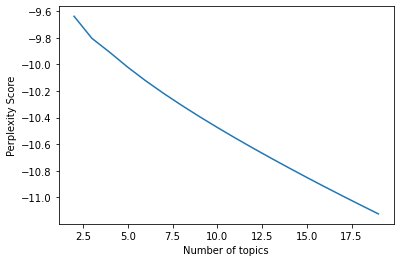

In [ ]:
x=range(2,20)
plt.plot(x, perplexity_values)
plt.xlabel('Number of topics')
plt.ylabel('Perplexity Score')
plt.show()

In [ ]:
## 하이퍼 파라미터 선정 및 LDA 시각화


# 위의 결과들 바탕으로 개수 수정하기
ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=10, alpha=0.1, id2word=dictionary)

In [ ]:
ldamodel.print_topics(num_words=15)

[(0,
  '0.032*"여행" + 0.031*"곳" + 0.017*"분" + 0.015*"자리" + 0.009*"공간" + 0.009*"하늘" + 0.008*"인사" + 0.008*"문화" + 0.008*"여행자" + 0.008*"사용" + 0.007*"손" + 0.007*"식사" + 0.007*"번째" + 0.007*"여름" + 0.007*"강"'),
 (1,
  '0.020*"내가" + 0.018*"이야기" + 0.016*"나라" + 0.013*"비행기" + 0.013*"나의" + 0.012*"대" + 0.011*"배" + 0.011*"건" + 0.009*"주변" + 0.009*"끝" + 0.008*"오늘" + 0.008*"관광객" + 0.008*"설명" + 0.007*"나무" + 0.007*"그곳"'),
 (2,
  '0.016*"거리" + 0.015*"거" + 0.013*"순간" + 0.013*"옆" + 0.012*"아침" + 0.012*"밖" + 0.011*"세상" + 0.011*"건물" + 0.010*"뿐" + 0.010*"밤" + 0.010*"삶" + 0.010*"달" + 0.010*"출발" + 0.010*"계획" + 0.009*"가족"'),
 (3,
  '0.025*"시작" + 0.021*"도착" + 0.018*"사진" + 0.014*"저녁" + 0.013*"풍경" + 0.013*"하루" + 0.011*"돈" + 0.010*"다양" + 0.009*"분위기" + 0.009*"산" + 0.008*"역" + 0.007*"마을" + 0.007*"카페" + 0.007*"카" + 0.007*"가게"'),
 (4,
  '0.016*"친구" + 0.013*"숙소" + 0.012*"르" + 0.012*"비" + 0.011*"장" + 0.010*"음식" + 0.010*"문" + 0.010*"맛" + 0.009*"바람" + 0.009*"이동" + 0.008*"얼굴" + 0.008*"자체" + 0.008*"고민" + 0.008*"여유" + 0.007*"정"'),


In [ ]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(ldamodel, corpus, dictionary)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.000909  0.032274       1        1  10.068622
4      0.063916  0.222329       2        1  10.054125
1      0.007165  0.015514       3        1  10.015520
0     -0.362778 -0.103460       4        1  10.013822
9      0.016337  0.048632       5        1   9.992849
8      0.014719  0.034419       6        1   9.986951
5      0.050795 -0.039205       7        1   9.986854
3      0.017611  0.061038       8        1   9.983851
6      0.170880 -0.310547       9        1   9.955420
2      0.020448  0.039006      10        1   9.941985, topic_info=    Term        Freq       Total Category  logprob  loglift
5     여행  713.000000  713.000000  Default  30.0000  30.0000
46     곳  702.000000  702.000000  Default  29.0000  29.0000
269   마음  574.000000  574.000000  Default  28.0000  28.0000
100   시작  557.000000  557.000000  Default  27.0000  27.0000
457    날  539.000000  539.000000  Default  26.0000  26.0000
..   ...         ...         ...      ...      ...      ...
131    밥  144.435884  145.218175  Topic10  -5.0454   2.3030
94    상상  141.589272  142.371563  Topic10  -5.0653   2.3029
487   기차  137.710062  138.492353  Topic10  -5.0931   2.3027
292   거기  123.850536  124.632827  Topic10  -5.1992   2.3021
1    코로나  123.675421  124.457712  Topic10  -5.2006   2.3021

[330 rows x 6 columns], token_table=      Topic      Freq Term
term                      
125       8  0.996204   가게
881       8  0.996584   가격
3732      3  0.994185   가기
1104      7  0.996636   가능
982       9  0.995081  가운데
...     ...       ...  ...
969       5  0.993308   호수
2515      1  0.997650   호텔
1524      5  0.991936   확인
374       4  0.989428    히
289       1  0.997118    힘

[300 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 5, 2, 1, 10, 9, 6, 4, 7, 3])